#### 0.0 Simulate phone dataset 
##### a) Use numpy.random.normal() to simulate a dataset with the following requirements:
###### Detta simulerar 400 x-värden från en normalfördelning med medelvärdet 100 och standardavvikelsen 100. Därefter tas absolutvärdet av dessa x-värden. Sedan simuleras 400 brusvärden från en normalfördelning med medelvärdet 0 och standardavvikelsen 50. Slutligen beräknas y-värdena enligt formeln y = 2x + 25 + brus. Datamängden plottas sedan med x-värdena på x-axeln och y-värdena på y-axeln.

Number of points x ≥ 300 min: 11
Number of points y < 0 kr: 8


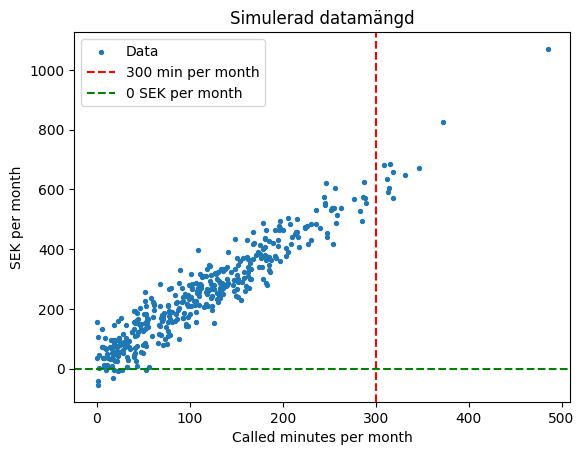

In [208]:
import numpy as np
import matplotlib.pyplot as plt

#sätt seed för reproducerbarhet
np.random.seed(42)

# simulerar 400 x-värden från en normalfördelning med mededlvärdet 100 och standardavvikelsen 100
X = np.random.normal(loc=100, scale=100, size=400)

# Ta absolutvärdet av x-värdena
x_abs = np.abs(X)

# Simulerar 400 brusvärden från en normalfördelning med medelvärdet 0 och standardavvikelsen 50
noise = np.random.normal(loc=0, scale=50, size=400)

# Låt y = 2x + 25 + brus(€)
y = 2 * x_abs + 25 + noise

# Beräkning av värden som är under eller lika med 300 och över 0
print("Number of points x ≥ 300 min:", np.sum(x_abs >= 300))
print("Number of points y < 0 kr:", np.sum(y < 0))

# Plottar datamängden
plt.scatter(x_abs, y, s=8, label="Data")
plt.axvline(x=300, color='red', linestyle='--', label="300 min per month")
plt.axhline(y=0, color='green', linestyle='--', label="0 SEK per month")
plt.xlabel("Called minutes per month")
plt.ylabel("SEK per month")
plt.title("Simulerad datamängd")
plt.legend()
plt.show()



##### 0.0 b) Now we want to remove some outliers according to this assumption:

Length of x, outliers removed: 400
Length of y, outliers removed: 381


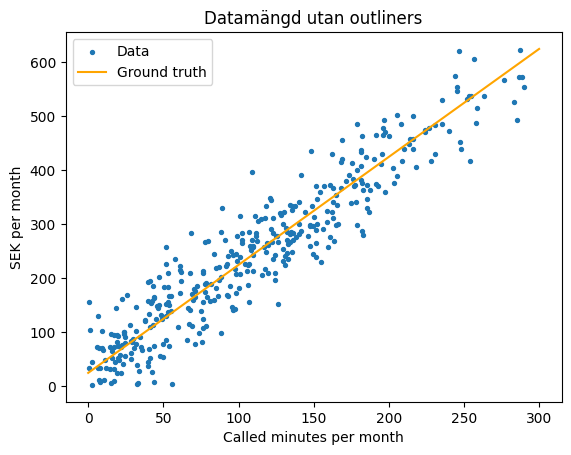

In [209]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Ta bort outliers
filter = (x_abs <= 300)&(y >= 0)
X = x_abs[filter]
y = y[filter]

print("Length of x, outliers removed:", len(x_abs))
print("Length of y, outliers removed:", len(y))

# Plotta den nya datamängden
plt.scatter(X, y, s=8, label="Data")
plt.xlabel("Called minutes per month")
plt.ylabel("SEK per month")
plt.title("Datamängd utan outliners")

# Plotta ground truth med de sanna parametrarna
x_true = np.linspace(0, 300, 100)
y_true = 25 + 2 * x_true
plt.plot(x_true, y_true, color="orange", label="Ground truth")
plt.legend()
plt.show()


#### 0.0 c) Insert the values into a DataFrame

In [210]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Skapa en DataFrame
df = pd.DataFrame({
    "Minutes": X,
    "Cost": y
})

print(df.head())


      Minutes        Cost
0  149.671415  244.621448
1   86.173570  167.378389
2  164.768854  354.799893
3  252.302986  531.955001
4   76.584663  155.666051


#### 1. Train|test split
##### Before moving on with linear regression we shall first perform a train-test-split.
##### a) Create a train-test-split function with the following call signature:

In [211]:
import pandas as pd
from sklearn.model_selection import train_test_split as tts

def train_test_split(X: pd.DataFrame, y: pd.DataFrame, train_fraction: float = 0.7, random_state: int = 42, replace: bool = False) -> tuple:
    X_train, X_test, y_train, y_test = tts(X, y, train_size=train_fraction, random_state=random_state, shuffle=not replace)
    return X_train, X_test, y_train, y_test


##### 1b) Now use this to split up your data into a training set and test set. Check manually that the split is performed correctly

In [212]:
# Dela upp data i en träningssats och en testssats
X_train, X_test, y_train, y_test = train_test_split(X, y, train_fraction=0.7, random_state=42)

# Kontrollera att spliten är korrekt
print("Träningssatsens storlek:", X_train.shape)
print("Testssatsens storlek:", X_test.shape)
print("Träningssatsens målvärden:", y_train.shape)
print("Testssatsens målvärden:", y_test.shape)

Träningssatsens storlek: (266,)
Testssatsens storlek: (115,)
Träningssatsens målvärden: (266,)
Testssatsens målvärden: (115,)


##### 2. Simple linear regression with normal equation

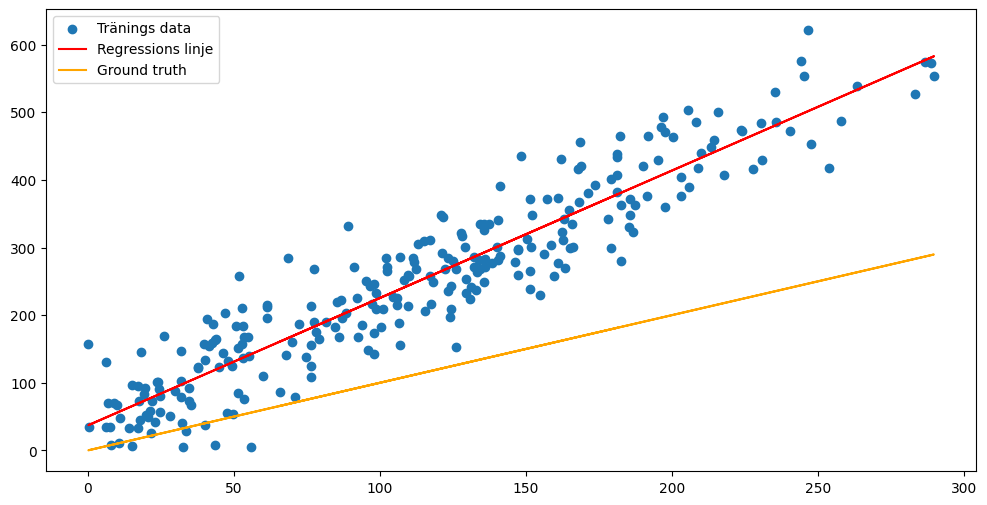

In [213]:
import numpy as np
import matplotlib.pyplot as plt

# Lägg till en kolumn med 1:or för att representera bias-termen
X_train = np.column_stack((np.ones(X_train.shape[0]), X_train))

# Beräkna koefficienterna med normal ekvation
normal_ekvation = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

plt.figure(figsize=(12, 6))

# Plotta träningssatsen
plt.scatter(X_train[:, 1], y_train, label="Tränings data")

# Plotta regressionslinjen
plt.plot(X_train[:, 1], X_train[:, 1] * normal_ekvation[1] + normal_ekvation[0], color="red", label="Regressions linje")

# Plotta Ground Truth
plt.plot(X_train[:, 1], X_train[:, 1], color="orange", label="Ground truth")

plt.legend()
plt.show()

# GÖR OM DENNA, DU HAR GLÖMT BETA SATSEN!!